In [3]:
# Load the Drive helper and mount
from google.colab import drive

#----------------------------------------------------------
# Enter your authorization code:
# 4/1AY0e-g7Fiz3h1_flJA0jGHgPyWZVvCAQ6EYi0x5RLjp-NESKMfuK0YyRSno
#----------------------------------------------------------

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install -U mxnet-cu101==1.7.0

     |███████████████████████████████▌| 834.1MB 1.2MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x652d6000 @  0x7ff8e8ec2615 0x591e47 0x4cc179 0x4cc2db 0x50a1cc 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50cc96 0x58e683 0x50c127 0x58e683 0x50c127 0x58e683 0x50c127 0x58e683 0x50c127 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd
     |████████████████████████████████| 846.0MB 22kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [6]:
!pip install gluoncv

     |████████████████████████████████| 1.0MB 8.5MB/s 
     |████████████████████████████████| 256kB 21.6MB/s 
     |████████████████████████████████| 11.8MB 23.5MB/s 
     |████████████████████████████████| 317kB 56.5MB/s 
     |████████████████████████████████| 133kB 56.1MB/s 
     |████████████████████████████████| 972kB 58.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 215kB 48.9MB/s 
     |████████████████████████████████| 102kB 15.9MB/s 
     |████████████████████████████████| 675kB 56.6MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 7.2MB 55.0MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
     |████████████████████████████████| 962kB 54.5MB/s 
     |████████████████████████████████| 2.6MB 53.4MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
  Created wheel for ConfigSpace: fil

In [7]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

%cd /content/drive/MyDrive/Colab_Notebooks/GreenLabs/Segmentation/

/content/drive/MyDrive/Colab_Notebooks/GreenLabs/Segmentation


In [ ]:
# Prepare the image
# url = 'https://github.com/zhanghang1989/image-data/blob/master/encoding/' + \
#     'segmentation/ade20k/ADE_val_00001755.jpg?raw=true'
# filename = 'ade20k_example.jpg'
# gluoncv.utils.download(url, filename, True)

14KB [00:00, 3479.31KB/s]             


'ade20k_example.jpg'

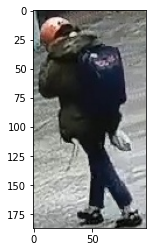

In [9]:
# Load the image
filename = 'obj_0001_030.jpg'
img = image.imread(filename)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

In [10]:
# normalize the image using dataset mean
from gluoncv.data.transforms.presets.segmentation import test_transform
ctx = mx.gpu(0)
img = test_transform(img, ctx)

In [11]:
print(img1.shape)

(1, 3, 187, 97)
(1, 3, 187, 97)


In [27]:
# Load the pre-trained model and make prediction
model_names = ['deeplab_resnet101_coco', 'deeplab_resnet101_ade', 'deeplab_resnet101_citys']
model_name = model_names[0]

model = gluoncv.model_zoo.get_model(model_name, pretrained=True, ctx=ctx)

100%|██████████| 221704/221704 [00:03<00:00, 57976.99KB/s]


In [37]:
import time

start = time.time()
# make prediction using single scale
output = model.predict(img1)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
stop = time.time()
print('Processing time: ', stop-start)

Processing time:  0.705632209777832


In [39]:
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

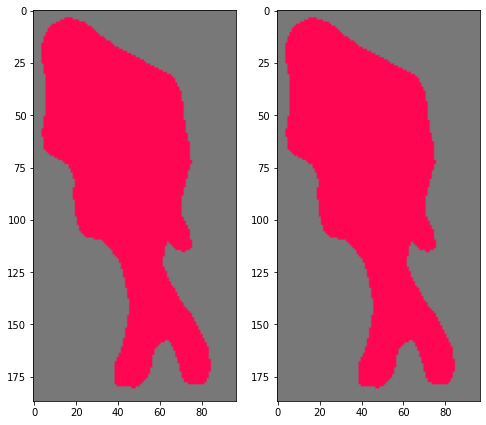

In [52]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# show the predicted mask
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()


In [ ]:
print('Finished')

Finished
